In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [121]:
nutricion = pd.read_csv("TablaNutricinal.csv")
nutricion

,Unnamed: 0,Producto,Marca,Cantidad,Caloria,Grasa,Carbohidrato,Proteina
0,0,Filetes de Atún en Aceite de Oliva con Ajo,Gomes da Costa,por 3 cucharadas soperas (60g),124kcal,"6,10g","0,00g","17,00g"
1,1,Caballa en Aceite,Caracas,por 1/4 taza de té (55g),125kcal,"10,00g","0,00g","8,30g"
2,2,Merluza en Aceite,Puglisi,por 3 cucharadas soperas) (60g),99kcal,"5,00g","0,00g","14,00g"
3,3,Aceite de Oliva Virgen Extra,La Toscana,por 1 cuchara sopera (13ml),108kcal,"12,00g","0,00g","0,00g"
4,4,Aderezo Italiano (Hecho con Aceite y Vinagre),Pennisi,por 1 cucharada,43kcal,"4,17g","1,53g","0,06g"
...,...,...,...,...,...,...,...,...
613,613,Helado,Exquisita,por 1 unidad (60g),180kcal,"12,00g","16,00g","3,00g"
614,614,Tableta Rellena Con Helado De Crema Americana,Too Good,por 1 unidad (50g),147kcal,"9,50g","13,00g","2,30g"
615,615,Helado de Chocolate,NaN,por 1 taza (50g),59kcal,"2,50g","7,30g","1,90g"
616,616,Café Helado,NaN,por 1 taza de café,4kcal,"0,01g","0,67g","0,19g"


In [122]:
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    618 non-null    int64 
 1   Producto      618 non-null    object
 2   Marca         322 non-null    object
 3   Cantidad      618 non-null    object
 4   Caloria       618 non-null    object
 5   Grasa         618 non-null    object
 6   Carbohidrato  618 non-null    object
 7   Proteina      618 non-null    object
dtypes: int64(1), object(7)
memory usage: 38.8+ KB


In [123]:
nutricion =nutricion.drop(columns="Unnamed: 0")

In [124]:
nutricion["Caloria"] = nutricion["Caloria"].str.strip("kcal")
nutricion["Grasa"] = nutricion["Grasa"].str.strip("g")
nutricion["Carbohidrato"] = nutricion["Carbohidrato"].str.strip("g")
nutricion["Proteina"] = nutricion["Proteina"].str.strip("g")

In [125]:
nutricion=nutricion.rename(columns={"Caloria":"Calorias (kcal)","Grasa":"Grasa (g)","Carbohidrato":"Carbohidrato (g)","Proteina":"Proteina (g)"})

In [126]:
nutricion

,Producto,Marca,Cantidad,Calorias (kcal),Grasa (g),Carbohidrato (g),Proteina (g)
0,Filetes de Atún en Aceite de Oliva con Ajo,Gomes da Costa,por 3 cucharadas soperas (60g),124,"6,10","0,00","17,00"
1,Caballa en Aceite,Caracas,por 1/4 taza de té (55g),125,"10,00","0,00","8,30"
2,Merluza en Aceite,Puglisi,por 3 cucharadas soperas) (60g),99,"5,00","0,00","14,00"
3,Aceite de Oliva Virgen Extra,La Toscana,por 1 cuchara sopera (13ml),108,"12,00","0,00","0,00"
4,Aderezo Italiano (Hecho con Aceite y Vinagre),Pennisi,por 1 cucharada,43,"4,17","1,53","0,06"
...,...,...,...,...,...,...,...
613,Helado,Exquisita,por 1 unidad (60g),180,"12,00","16,00","3,00"
614,Tableta Rellena Con Helado De Crema Americana,Too Good,por 1 unidad (50g),147,"9,50","13,00","2,30"
615,Helado de Chocolate,NaN,por 1 taza (50g),59,"2,50","7,30","1,90"
616,Café Helado,NaN,por 1 taza de café,4,"0,01","0,67","0,19"


In [127]:
nutricion["Calorias (kcal)"][459]=nutricion["Calorias (kcal)"][459].strip("5 cm) -  ")

In [128]:
nutricion[["Calorias (kcal)","Grasa (g)","Carbohidrato (g)","Proteina (g)"]] =nutricion[["Calorias (kcal)","Grasa (g)","Carbohidrato (g)","Proteina (g)"]].apply(lambda x: x.str.replace(',','.'))


In [139]:
nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Producto          618 non-null    object 
 1   Marca             322 non-null    object 
 2   Cantidad          618 non-null    object 
 3   Calorias (kcal)   618 non-null    Int64  
 4   Grasa (g)         618 non-null    float64
 5   Carbohidrato (g)  618 non-null    float64
 6   Proteina (g)      618 non-null    float64
dtypes: Int64(1), float64(3), object(3)
memory usage: 34.5+ KB


In [137]:
nutricion[["Grasa (g)","Carbohidrato (g)","Proteina (g)"]] = nutricion[["Grasa (g)","Carbohidrato (g)","Proteina (g)"]].astype(str)

In [138]:
nutricion["Grasa (g)"] = nutricion["Grasa (g)"].str.replace(",", ".").astype("float64")
nutricion["Carbohidrato (g)"] = nutricion["Carbohidrato (g)"].str.replace(",", ".").astype("float64")
nutricion["Proteina (g)"] = nutricion["Proteina (g)"].str.replace(",", ".").astype("float64")

In [146]:
x1 = nutricion.head(4)

In [144]:
nutricion

,Producto,Marca,Cantidad,Calorias (kcal),Grasa (g),Carbohidrato (g),Proteina (g)
0,Filetes de Atún en Aceite de Oliva con Ajo,Gomes da Costa,por 3 cucharadas soperas (60g),124,6.10,0.00,17.00
1,Caballa en Aceite,Caracas,por 1/4 taza de té (55g),125,10.00,0.00,8.30
2,Merluza en Aceite,Puglisi,por 3 cucharadas soperas) (60g),99,5.00,0.00,14.00
3,Aceite de Oliva Virgen Extra,La Toscana,por 1 cuchara sopera (13ml),108,12.00,0.00,0.00
4,Aderezo Italiano (Hecho con Aceite y Vinagre),Pennisi,por 1 cucharada,43,4.17,1.53,0.06
...,...,...,...,...,...,...,...
613,Helado,Exquisita,por 1 unidad (60g),180,12.00,16.00,3.00
614,Tableta Rellena Con Helado De Crema Americana,Too Good,por 1 unidad (50g),147,9.50,13.00,2.30
615,Helado de Chocolate,NaN,por 1 taza (50g),59,2.50,7.30,1.90
616,Café Helado,NaN,por 1 taza de café,4,0.01,0.67,0.19


<Axes: xlabel='Producto', ylabel='Proteina (g)'>

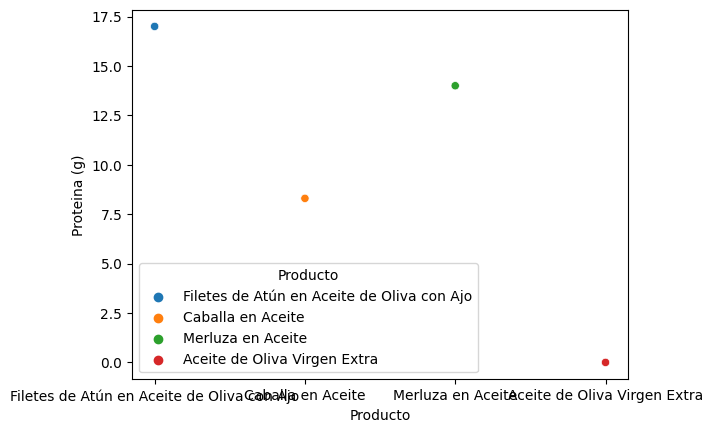

In [151]:
sns.scatterplot(data=x1,x="Producto",y="Proteina (g)",hue="Producto")

In [33]:
fallo=nutricion.where(nutricion["Caloras (kcal)"]=='5 cm) -  112')

In [35]:
fallo.dropna()

,Producto,Marca,Cantidad,Caloras (kcal),Grasa (g),Carbohidrato (g),Proteina (g)
459,"Papas a la Francesa (Prefritas, Congeladas)",McCain,"por 1 porción de 10 tiras (2,5 cm",5 cm) - 112,"5,96","13,14","1,32"


In [152]:
nutricion.to_csv("Normalizacion.csv")